# 1. Generate model for discrete data

푸아송 분포(Poisson distribution)

In [1]:
dpois(x=3, lambda=5)

[1] 0.1403739

In [4]:
dpois(x = 0:10, lambda = 5)

[1] 0.006737947 0.033689735 0.084224337 0.140373896 0.175467370 0.175467370
 [7] 0.146222808 0.104444863 0.065278039 0.036265577 0.018132789

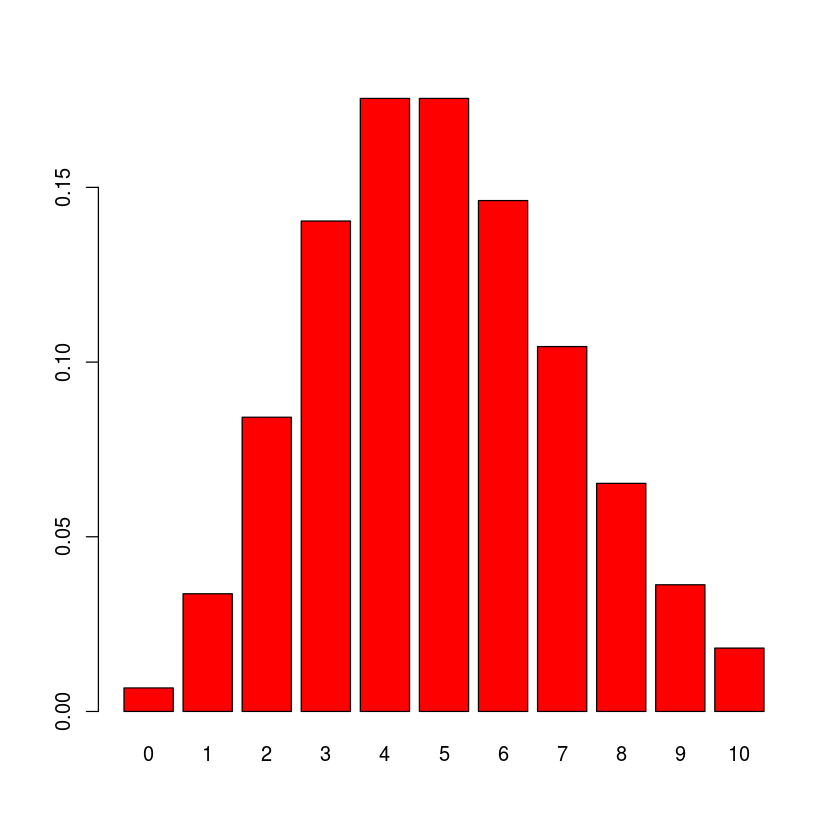

In [6]:
barplot(dpois(0:10, 5), names.arg = 0:10, col = "red")

푸 아송 분포는 돌연변이와 같은 드문 사건에 좋은 모델입니다. 이산 사건에 대한 다른 유용한 확률 모델은 베르누이, 이항 분포 및 다항 분포이다. 이제는 이 모델들을 살펴 보겠습니다.

## 1.3. 이산 확률 모델 사용하기

표본에 대한 범주 형 변수를 측정 할 때 종종 수의 벡터에서 여러 수준의 빈도를 집계하려고합니다. **R** 에서는 이러한 범주형 번수를 Factor라는 방법을 사용해 표현합니다. 여기서 우리는 표로 작성한 벡터에서 19 명의 피험자에 대해 다른 혈액 유전자형을 포착합니다.

In [8]:
genotype = c("AA","AO","BB","AO","OO","AO","AA","BO","BO","AO","BB","AO","BO","AB","OO","AB","BB","AO","AO")
table(genotype)

genotype
AA AB AO BB BO OO 
 2  2  7  3  3  2 

요인을 만들 때 R은 자동으로 레벨을 감지합니다. 레벨 기능을 사용하여 레벨에 액세스 할 수 있습니다.

In [9]:
genotypeF = factor(genotype)
levels(genotypeF)

[1] "AA" "AB" "AO" "BB" "BO" "OO"

데이터가 관측되는 순서가 중요하지 않은 경우 무작위 변수를 교환 가능이라고합니다. 이 경우 요인에서 사용할 수있는 모든 정보는 요인 수준의 수로 요약됩니다. 그런 다음 주파수의 벡터가 데이터의 모든 관련 정보를 캡처하기에 충분하므로 데이터를 효과적으로 압축하는 방법을 제공한다고합니다.

### 1.3.1 베르누이 시행

동전 던지기에는 두 가지 결과가 있습니다. 베르누이 시험이라고 불리는이 간단한 실험은 베르누이 (Bernoulli) 무작위 변수를 사용하여 모델링됩니다. 몇 가지 실험을 시도하여 이러한 임의의 변수 중 일부가 어떻게 보이는지 봅시다.  

15 개의 공정한 동전 던지기 시퀀스를 시뮬레이션하려고한다고 가정 해보십시오. 성공 확률이 0.5 인 베르누이 재판 (fair coin)의 결과를 얻으려면,

In [10]:
rbinom(15, prob = 0.5, size = 1)

[1] 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1

첫 번째 매개 변수는 우리가 관찰하고자하는 시도의 수입니다. 여기에서 우리는 15 점을 선택했습니다. 우리는 prob에 의해 성공 확률을 지정합니다.`size=1`은 각각의 개별 시험이 단지 하나의 동전 던지기로 이루어져 있다고 설정합니다.

### 1.3.3 포아송 분포

Poisson distribution with rate parameter $λ = np $
. We already used this fact, and this distribution, in the HIV example 

$$ P(X=k)= \frac{\lambda^k\;e^{-\lambda}}{k!} $$

For instance, let’s take $λ = 5 $ and compute $ P(X=3) $

In [11]:
5^3 * exp(-5) / factorial(3)

[1] 0.1403739

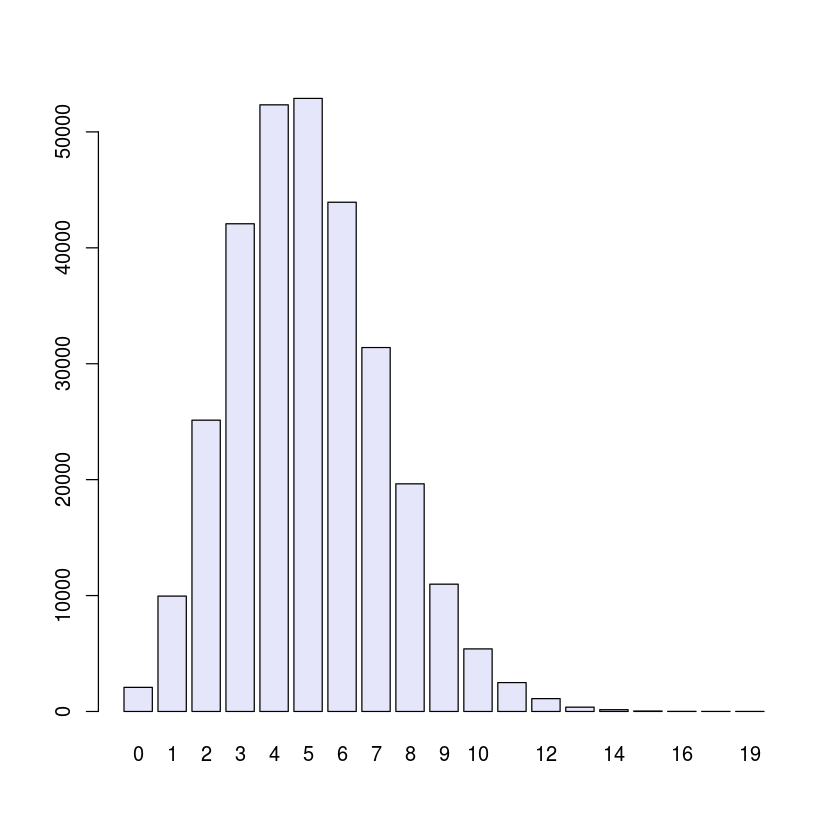

In [12]:
simulations = rbinom(n = 300000, prob = 5e-4, size = 10000)
barplot(table(simulations), col = "lavender")

### 1.3.4. 에피토프 검출을위한 생성 모델

특정 의약품을 시험 할 때 알레르기 반응을 유발하는 단백질을 검출하는 것이 중요합니다. 그러한 반응을 담당하는 분자 부위를 에피토프(epitopes)라고합니다.

One patient’s data
The data for one patient’s assay look like this:

```
##   [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
##  [30] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
##  [59] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
##  [88] 0 0 0 0 0 0 0 0 0 0 0 0 0
```
여기서 1은 적중을 의미합니다.


Results from the 50 assays

우리는 100 개 위치에서 각각 50 명의 환자를 대상으로 데이터를 조사 할 것입니다.